In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
stock_data = pd.read_csv('../../datasets/b3_dados/processed/acoes_concat.csv')
scaled_financial_assets = pd.read_csv('../../datasets/b3_dados/processed/selected_stocks_normalized.csv')

1. **Gráficos de Barras**\
\
Objetivo: Comparar valores agregados (como média, máximo ou mínimo) entre ações.

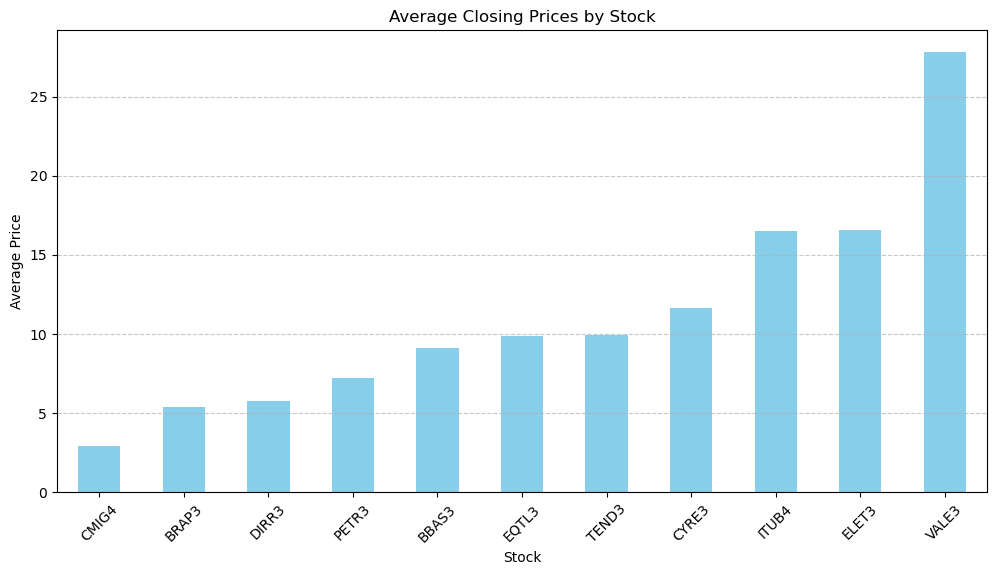

In [3]:

def plot_average_prices(data):
    avg_prices = data.iloc[:, 1:].mean()  # Calcula a média das ações (exclui a coluna de data)
    
    plt.figure(figsize=(12, 6))
    avg_prices.sort_values().plot(kind='bar', color='skyblue')
    plt.title('Average Closing Prices by Stock')
    plt.ylabel('Average Price')
    plt.xlabel('Stock')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Exemplo
plot_average_prices(stock_data)


2. **Gráficos de Linhas**\
\
Objetivo: Comparar preços ao longo do tempo para várias ações.

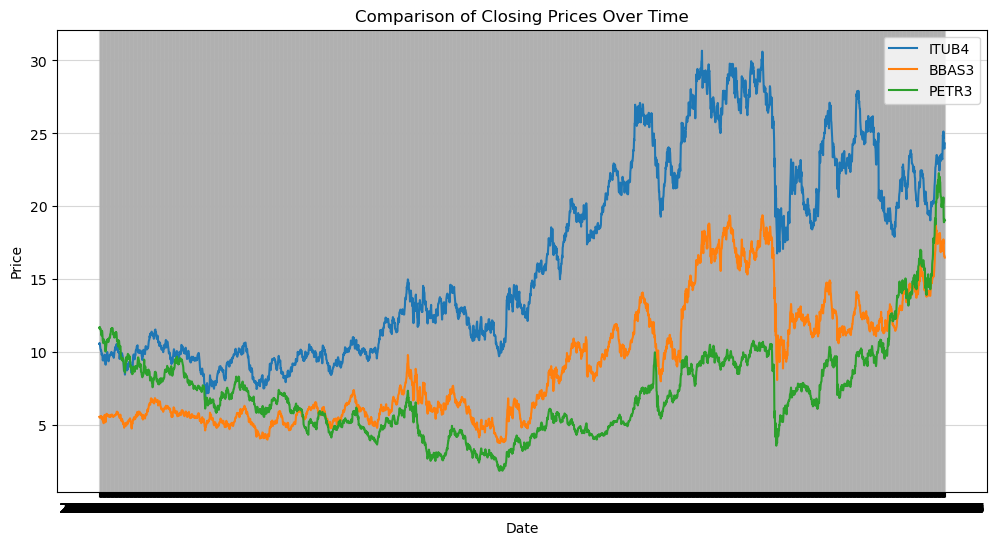

In [4]:
def plot_multiple_stocks(data, stocks):
    plt.figure(figsize=(12, 6))
    for stock in stocks:
        plt.plot(data['Date'], data[stock], label=stock)
    plt.title('Comparison of Closing Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

# Exemplo
plot_multiple_stocks(stock_data, ['ITUB4', 'BBAS3', 'PETR3'])


3. **Boxplots**\
\
Objetivo: Comparar a dispersão e os outliers dos preços de diferentes ações.

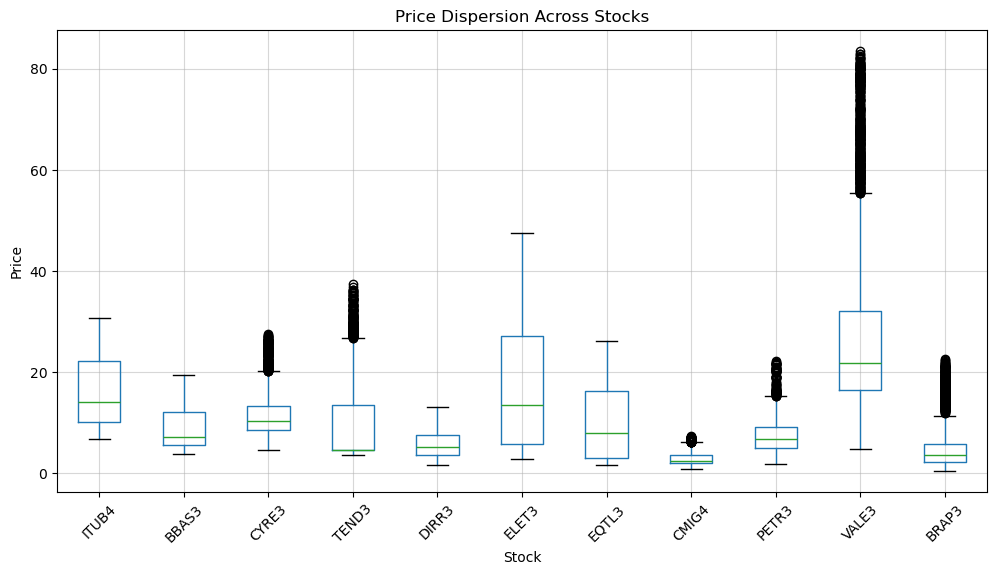

In [5]:
def plot_boxplot(data, title):
    plt.figure(figsize=(12, 6))
    if 'Date' in data.columns:
        data.iloc[:, 1:].boxplot()
    else:
        data.boxplot()
    plt.title(title)
    plt.ylabel('Price')
    plt.xlabel('Stock')
    plt.xticks(rotation=45)
    plt.grid(alpha=0.5)
    plt.show()

# Exemplo
plot_boxplot(stock_data,"Price Dispersion Across Stocks")


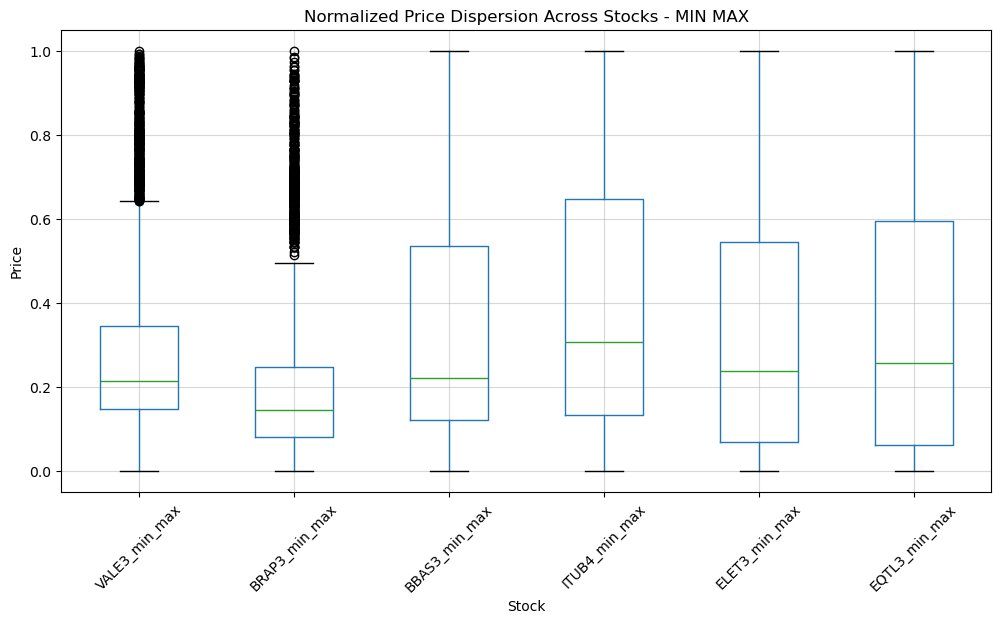

In [6]:
plot_boxplot(scaled_financial_assets.filter(like='_min_max'), "Normalized Price Dispersion Across Stocks - MIN MAX")


4. **Heatmaps de Correlação**\
\
Objetivo: Comparar a correlação entre os preços das ações.

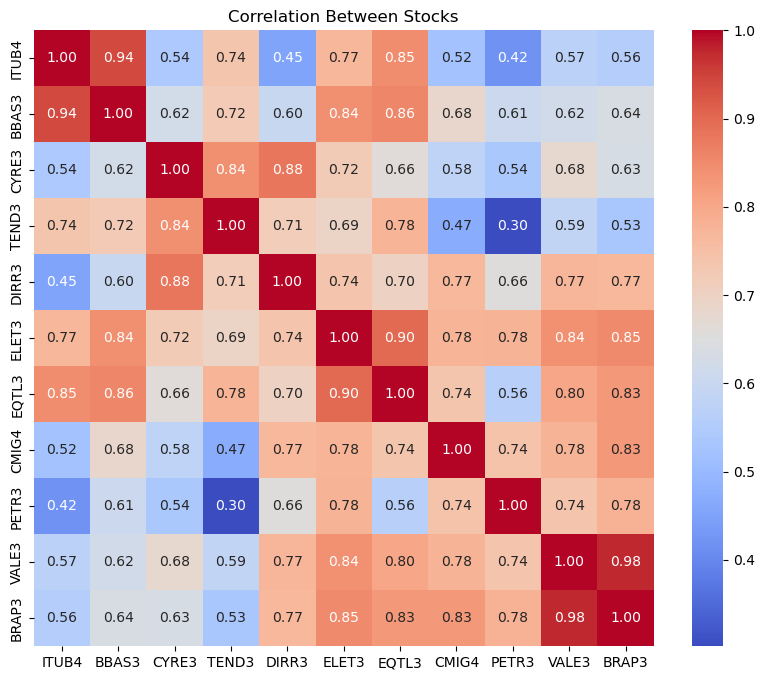

In [7]:
import seaborn as sns

def plot_correlation_matrix(data):
    correlation = data.iloc[:, 1:].corr()  # Calcula a correlação entre as ações
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title('Correlation Between Stocks')
    plt.show()

# Exemplo
plot_correlation_matrix(stock_data)


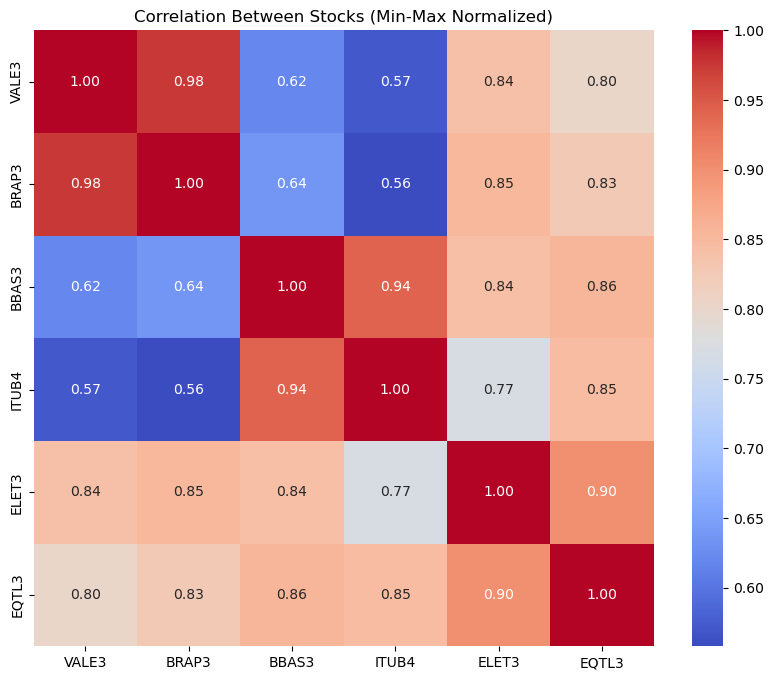

In [8]:

# Seleciona apenas as colunas normalizadas com min-max
min_max_columns = [col for col in scaled_financial_assets.columns if 'min_max' in col]

# Renomeia as colunas para remover a extensão 'min_max'
renamed_columns = {col: col.replace('_min_max', '') for col in min_max_columns}
assets_normalized_renamed = scaled_financial_assets[min_max_columns].rename(columns=renamed_columns)

# Calcula a matriz de correlação com os nomes corrigidos
correlation_min_max = assets_normalized_renamed.corr()

# Plota a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_min_max, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Between Stocks (Min-Max Normalized)')
plt.show()


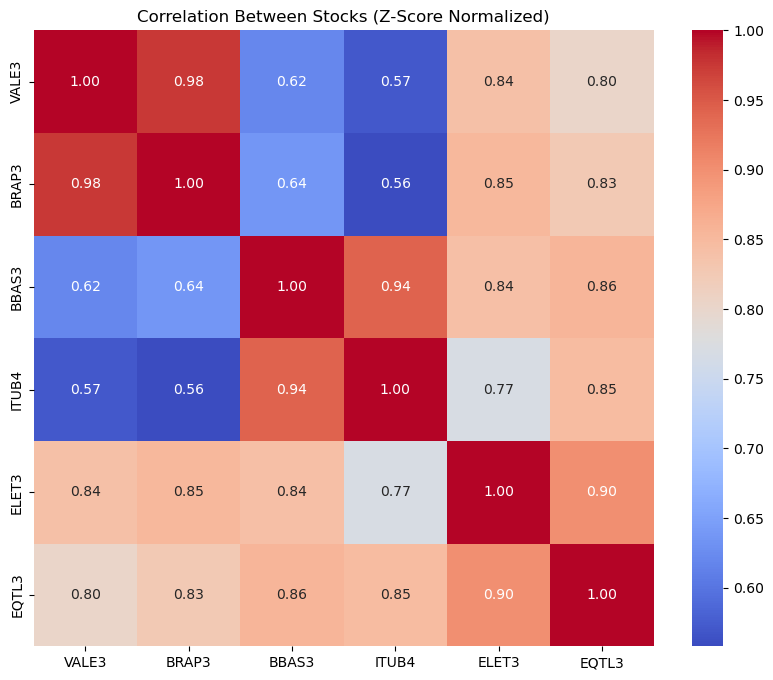

In [9]:
# Seleciona apenas as colunas normalizadas com z-score
z_score_columns = [col for col in scaled_financial_assets.columns if 'z_score' in col]

# Renomeia as colunas para remover a extensão 'z_score'
renamed_z_score_columns = {col: col.replace('_z_score', '') for col in z_score_columns}
assets_normalized_z_score_renamed = scaled_financial_assets[z_score_columns].rename(columns=renamed_z_score_columns)

# Calcula a matriz de correlação com os nomes corrigidos
correlation_z_score = assets_normalized_z_score_renamed.corr()

# Plota a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_z_score, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Between Stocks (Z-Score Normalized)')
plt.show()

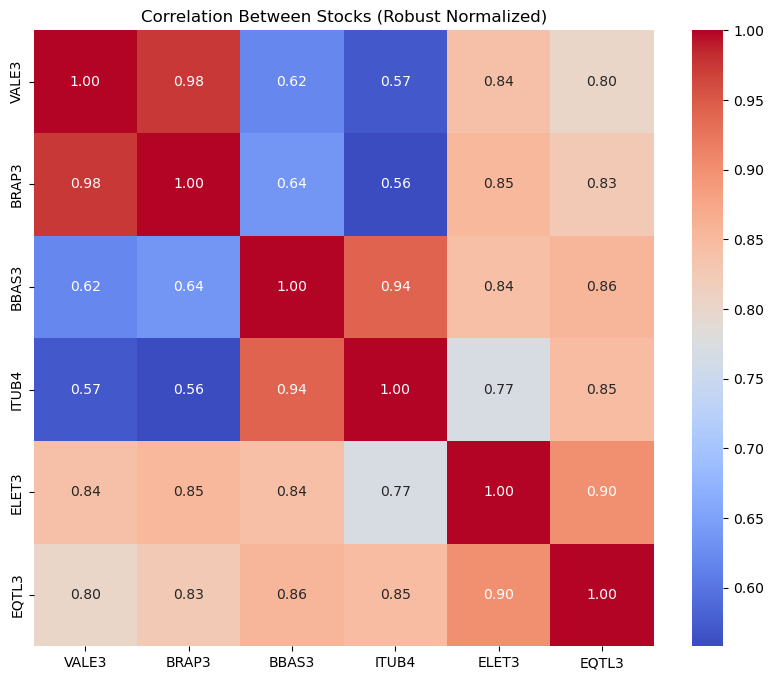

In [10]:
# Seleciona apenas as colunas normalizadas com robust
robust_columns = [col for col in scaled_financial_assets.columns if 'robust' in col]

# Renomeia as colunas para remover a extensão 'robust'
renamed_robust_columns = {col: col.replace('_robust', '') for col in robust_columns}
assets_normalized_robust_renamed = scaled_financial_assets[robust_columns].rename(columns=renamed_robust_columns)

# Calcula a matriz de correlação com os nomes corrigidos
correlation_robust = assets_normalized_robust_renamed.corr()

# Plota a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_robust, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Between Stocks (Robust Normalized)')
plt.show()